In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv('Dataset .csv')

In [4]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [5]:
df['Cuisines'].isnull().sum()
df['Cuisines'].isnull().sum() / len(df)

0.0009423097057899697

In [6]:
df_cleaned_cuisines = df.dropna(subset=['Cuisines'])
ind_cuisines = df_cleaned_cuisines['Cuisines'].str.split(', ').explode()

In [8]:
df_cleaned_cuisines.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
cuisine_counts = Counter(ind_cuisines)

In [29]:
# Level1 Task1

In [10]:
top_3_cuisines = cuisine_counts.most_common(3) 

In [11]:
print("Top 3 most common cuisines in the dataset:")
for cuisine, count in top_3_cuisines:
    print(f"- {cuisine}: {count} restaurants")

Top 3 most common cuisines in the dataset:
- North Indian: 3960 restaurants
- Chinese: 2735 restaurants
- Fast Food: 1986 restaurants


In [12]:
total_restaurants_with_cuisines = len(df_cleaned_cuisines)
print("\nPercentage of restaurants serving each of the top cuisines:")
for cuisine, count in top_3_cuisines:
    percentage = (count / total_restaurants_with_cuisines) * 100
    print(f"- {cuisine}: {percentage:.2f}%")


Percentage of restaurants serving each of the top cuisines:
- North Indian: 41.50%
- Chinese: 28.66%
- Fast Food: 20.81%


In [ ]:
# Level1 Task2

In [76]:

city_restaurant_counts = df['City'].value_counts()
city_with_most_restaurants = city_restaurant_counts.idxmax()
num_restaurants_in_city = city_restaurant_counts.max()
print(f" City with the highest number of restaurants: {city_with_most_restaurants} ({num_restaurants_in_city} restaurants)")

 City with the highest number of restaurants: New Delhi (5473 restaurants)


In [77]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\n Average rating for restaurants in each city :")
print(average_rating_by_city.to_markdown(numalign="left", stralign="left"))


 Average rating for restaurants in each city :
| City                   | Aggregate rating   |
|:-----------------------|:-------------------|
| Inner City             | 4.9                |
| Quezon City            | 4.8                |
| Makati City            | 4.65               |
| Pasig City             | 4.63333            |
| Mandaluyong City       | 4.625              |
| Beechworth             | 4.6                |
| London                 | 4.535              |
| Taguig City            | 4.525              |
| Tagaytay City          | 4.5                |
| Secunderabad           | 4.5                |
| Lincoln                | 4.5                |
| Orlando                | 4.475              |
| Tampa Bay              | 4.41               |
| Rest of Hawaii         | 4.41               |
| Tanunda                | 4.4                |
| Palm Cove              | 4.4                |
| Bangalore              | 4.375              |
| Dubai                  | 4.37         

In [79]:
city_with_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()
print(f"\n City with the highest average rating: {city_with_highest_avg_rating} (Average Rating: {highest_avg_rating:})")


 City with the highest average rating: Inner City (Average Rating: 4.9)


In [30]:
# Level1 Task3 Price Range Distribution

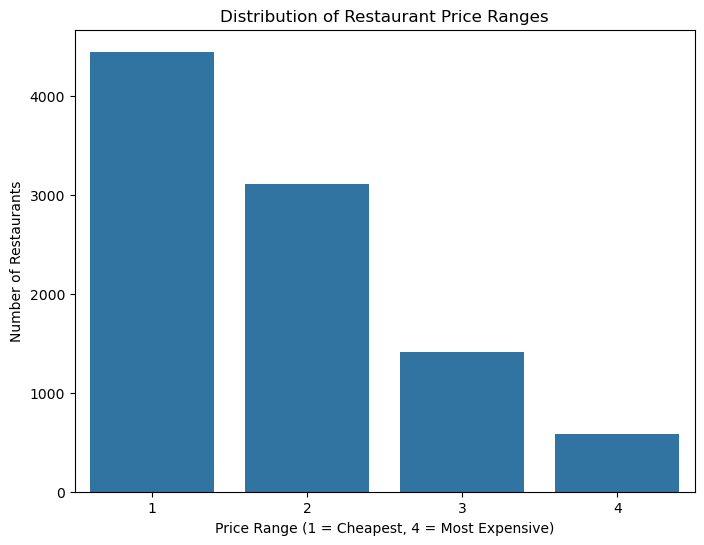

In [17]:

price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('Distribution of Restaurant Price Ranges')
plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)')
plt.ylabel('Number of Restaurants')
plt.savefig('price_range_distribution.png') # Save the plot as a PNG image
plt.show()

In [19]:
price_range_percentages = (price_range_counts / len(df)) * 100
print(price_range_percentages)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [ ]:
# Level1 Task4 Online Delivery

In [80]:

online_delivery_counts = df['Has Online delivery'].value_counts()
restaurants_with_online_delivery = online_delivery_counts.get('Yes', 0)
percentage_online_delivery = (restaurants_with_online_delivery / len(df)) * 100
print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [81]:
average_rating_by_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
avg_rating_with_delivery = average_rating_by_online_delivery.get('Yes', 0)
avg_rating_without_delivery = average_rating_by_online_delivery.get('No', 0)
print(f"\n Average rating for restaurants with online delivery: {avg_rating_with_delivery:.2f}")
print(f" Average rating for restaurants without online delivery: {avg_rating_without_delivery:.2f}")


 Average rating for restaurants with online delivery: 3.25
 Average rating for restaurants without online delivery: 2.47


In [26]:
# Level2 Task1

In [27]:
rating_distribution = df['Aggregate rating'].value_counts().sort_index(ascending=False)
print("Distribution of Aggregate Ratings (Count for each rating):",rating_distribution.to_markdown(numalign="left", stralign="left"))
most_common_rating = rating_distribution.idxmax()
count_most_common_rating = rating_distribution.max()
print(f"\n   The most common aggregate rating is: {most_common_rating} (found in {count_most_common_rating} restaurants)")

1. Distribution of Aggregate Ratings (Count for each rating): | Aggregate rating   | count   |
|:-------------------|:--------|
| 4.9                | 61      |
| 4.8                | 25      |
| 4.7                | 42      |
| 4.6                | 78      |
| 4.5                | 95      |
| 4.4                | 144     |
| 4.3                | 174     |
| 4.2                | 221     |
| 4.1                | 274     |
| 4                  | 266     |
| 3.9                | 335     |
| 3.8                | 400     |
| 3.7                | 427     |
| 3.6                | 458     |
| 3.5                | 480     |
| 3.4                | 498     |
| 3.3                | 483     |
| 3.2                | 522     |
| 3.1                | 519     |
| 3                  | 468     |
| 2.9                | 381     |
| 2.8                | 315     |
| 2.7                | 250     |
| 2.6                | 191     |
| 2.5                | 110     |
| 2.4                | 87      |
| 2.3         

In [82]:
average_votes = df['Votes'].mean()
print(f"\n Average number of votes received by restaurants: {average_votes:.2f}")


 Average number of votes received by restaurants: 156.91


In [25]:
#  Level2 Task2 Cuisine Combination

In [34]:
print("1. Most Common Cuisine Combinations:")
df_cuisine_analysis = df.dropna(subset=['Cuisines', 'Aggregate rating'])
cuisine_combination_counts = df_cuisine_analysis['Cuisines'].value_counts()
print(cuisine_combination_counts.head(5).to_markdown(numalign="left", stralign="left"))

1. Most Common Cuisine Combinations:
| Cuisines              | count   |
|:----------------------|:--------|
| North Indian          | 936     |
| North Indian, Chinese | 511     |
| Chinese               | 354     |
| Fast Food             | 354     |
| North Indian, Mughlai | 334     |


In [36]:
average_rating_by_combination = df_cuisine_analysis.groupby('Cuisines')['Aggregate rating'].mean()
# avg rating is considered in the analysis if a cuisine combination appears for atleast five times in the dataset 
combination_index = cuisine_combination_counts[cuisine_combination_counts >=5].index
average_rating_by_combination_filtered = average_rating_by_combination[average_rating_by_combination.index.isin(combination_index)]
top_rated_combinations = average_rating_by_combination_filtered.sort_values(ascending=False)
print(top_rated_combinations.head(10).to_markdown(numalign="left", stralign="left"))

| Cuisines                              | Aggregate rating   |
|:--------------------------------------|:-------------------|
| North Indian, European, Mediterranean | 4.46               |
| Burger                                | 4.45               |
| Modern Indian                         | 4.34545            |
| Indian                                | 4.25               |
| International                         | 4.23333            |
| Italian, Pizza, Sandwich              | 4.22               |
| Steak                                 | 4.18571            |
| French                                | 4.18571            |
| Cafe, Bakery, Desserts                | 4.16667            |
| Cafe, Italian, Continental            | 4.15               |


In [37]:
# Level2 Task3

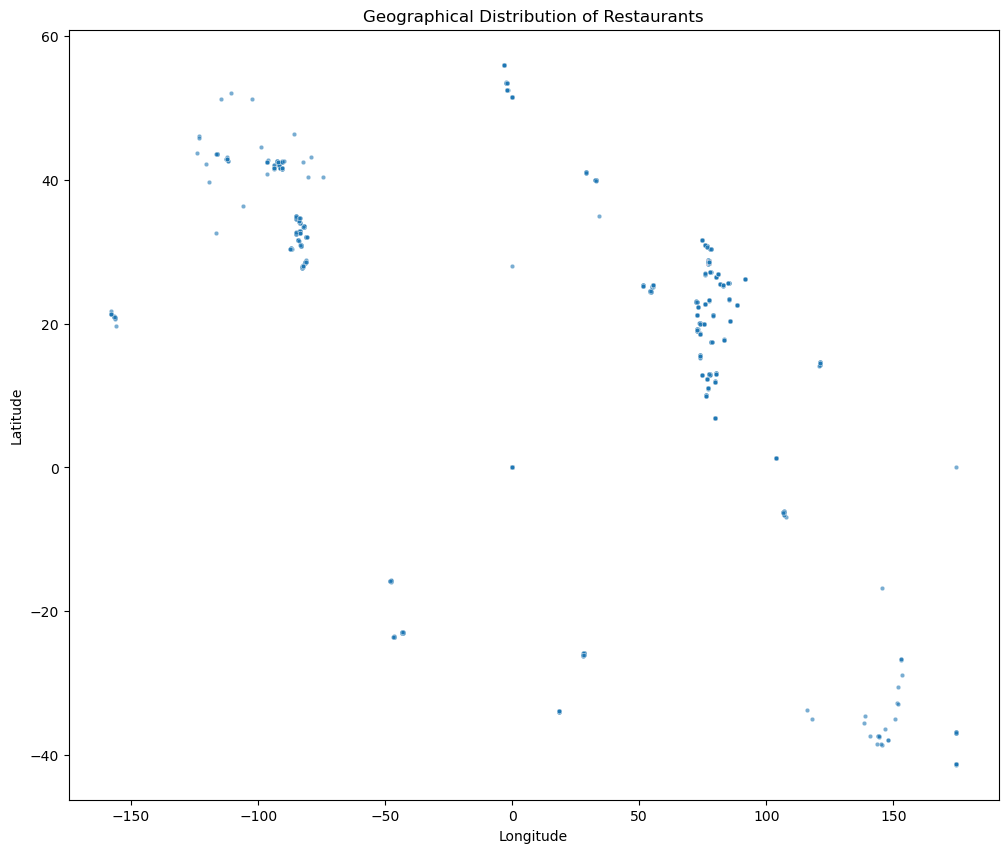

In [38]:
df_locations = df.dropna(subset=['Latitude', 'Longitude'])
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df_locations, alpha=0.6, s=10)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('restaurant_locations_scatter.png')

In [40]:
print("Restaurants appear to be heavily concentrated in certain geographical areas, forming dense clusters: like between the latitude [25 to 55] and longitude [-125 to -50], and another cluster between latitude [5 to 35] and longitude [50 to 100]" )

Restaurants appear to be heavily concentrated in certain geographical areas, forming dense clusters: like between the latitude [25 to 55] and longitude [-125 to -50], and another cluster between latitude [5 to 35] and longitude [50 to 100]


In [41]:
# Level2 Task4 

In [42]:
restaurant_name_counts = df['Restaurant Name'].value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
if not chains.empty:
    print("\n1. Identified Restaurant Chains (Names appearing more than once):")
    print(chains.head(10).to_markdown(numalign="left", stralign="left"))
else:
    print("\n1. No significant restaurant chains (names appearing more than once) identified in the dataset.")


1. Identified Restaurant Chains (Names appearing more than once):
| Restaurant Name   | count   |
|:------------------|:--------|
| Cafe Coffee Day   | 83      |
| Domino's Pizza    | 79      |
| Subway            | 63      |
| Green Chick Chop  | 51      |
| McDonald's        | 48      |
| Keventers         | 34      |
| Pizza Hut         | 30      |
| Giani             | 29      |
| Baskin Robbins    | 28      |
| Barbeque Nation   | 26      |


In [84]:
restaurant_name_counts = df['Restaurant Name'].value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
if not chains.empty:
    df_chains = df[df['Restaurant Name'].isin(chains.index)].copy()
    chain_analysis = df_chains.groupby('Restaurant Name').agg(
        Number_of_Outlets=('Restaurant ID', 'count'), # Count number of outlets for each chain
        Average_Rating=('Aggregate rating', 'mean'),  # Calculate average rating
        Total_Votes=('Votes', 'sum')                  # Sum votes for popularity
    ).sort_values(by='Number_of_Outlets', ascending=False) 
    print("\n Ratings and Popularity of Restaurant Chains:")
    print(chain_analysis.head(15).to_markdown(numalign="left", stralign="left"))
else:
    print("\n No chains found to analyze ratings and popularity as none were identified.")


 Ratings and Popularity of Restaurant Chains:
| Restaurant Name   | Number_of_Outlets   | Average_Rating   | Total_Votes   |
|:------------------|:--------------------|:-----------------|:--------------|
| Cafe Coffee Day   | 83                  | 2.41928          | 2428          |
| Domino's Pizza    | 79                  | 2.74051          | 6643          |
| Subway            | 63                  | 2.90794          | 6124          |
| Green Chick Chop  | 51                  | 2.67255          | 964           |
| McDonald's        | 48                  | 3.33958          | 5291          |
| Keventers         | 34                  | 2.87059          | 1263          |
| Pizza Hut         | 30                  | 3.32             | 4961          |
| Giani             | 29                  | 2.68966          | 854           |
| Baskin Robbins    | 28                  | 1.86071          | 428           |
| Barbeque Nation   | 26                  | 4.35385          | 28142         |
| Bar

In [49]:
# Level3 Task2 Votes Analysis

In [50]:
restaurants_highest_votes = df.sort_values(by='Votes', ascending=False)
print("\n Restaurants with the Highest Number of Votes:")
print(restaurants_highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating', 'City']].head(5).to_markdown(numalign="left", stralign="left"))


 Restaurants with the Highest Number of Votes:
|      | Restaurant Name           | Votes   | Aggregate rating   | City      |
|:-----|:--------------------------|:--------|:-------------------|:----------|
| 728  | Toit                      | 10934   | 4.8                | Bangalore |
| 735  | Truffles                  | 9667    | 4.7                | Bangalore |
| 3994 | Hauz Khas Social          | 7931    | 4.3                | New Delhi |
| 2412 | Peter Cat                 | 7574    | 4.3                | Kolkata   |
| 739  | AB's - Absolute Barbecues | 6907    | 4.6                | Bangalore |


In [51]:
restaurants_lowest_votes = df.sort_values(by='Votes', ascending=True)
print("\n Restaurants with the Lowest Number of Votes:")
print(restaurants_lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating', 'City']].head(5).to_markdown(numalign="left", stralign="left"))


 Restaurants with the Lowest Number of Votes:
|      | Restaurant Name            | Votes   | Aggregate rating   | City      |
|:-----|:---------------------------|:--------|:-------------------|:----------|
| 5799 | Khalsa Eating Point        | 0       | 0                  | New Delhi |
| 7411 | Radha Swami Chaat Bhandar  | 0       | 0                  | New Delhi |
| 7414 | Ram Ram Ji Kachori Bhandar | 0       | 0                  | New Delhi |
| 7415 | Rana's Food Corner         | 0       | 0                  | New Delhi |
| 7416 | Sanjay Chicken Shop        | 0       | 0                  | New Delhi |


In [53]:
df_correlation_analysis = df.dropna(subset=['Votes', 'Aggregate rating'])
correlation_votes_rating = df_correlation_analysis['Votes'].corr(df_correlation_analysis['Aggregate rating'])
print(f"   Correlation Coefficient between 'Votes' and 'Aggregate rating': {correlation_votes_rating:.4f}")

   Correlation Coefficient between 'Votes' and 'Aggregate rating': 0.3137


In [54]:
# Level3 Task2 Price Range vs. Online Delivery andTable Booking

In [55]:
print(df['Price range'].value_counts().to_markdown(numalign="left", stralign="left"))

| Price range   | count   |
|:--------------|:--------|
| 1             | 4444    |
| 2             | 3113    |
| 3             | 1408    |
| 4             | 586     |


In [56]:
df['Price range'].describe()

count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64

In [57]:
print (df['Has Online delivery'].value_counts().to_markdown(numalign="left", stralign="left"))

| Has Online delivery   | count   |
|:----------------------|:--------|
| No                    | 7100    |
| Yes                   | 2451    |


In [58]:
print(df['Has Table booking'].value_counts().to_markdown(numalign="left", stralign="left"))

| Has Table booking   | count   |
|:--------------------|:--------|
| No                  | 8393    |
| Yes                 | 1158    |


In [66]:
df['Has Online delivery_numeric'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Table booking_numeric'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [62]:
correlation_data = df[['Price range', 'Has Online delivery_numeric', 'Has Table booking_numeric']]
correlation_matrix = correlation_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix.to_markdown(numalign="left", stralign="left"))


Correlation Matrix:
 |                             | Price range   | Has Online delivery_numeric   | Has Table booking_numeric   |
|:----------------------------|:--------------|:------------------------------|:----------------------------|
| Price range                 | 1             | 0.0779178                     | 0.501925                    |
| Has Online delivery_numeric | 0.0779178     | 1                             | 0.101224                    |
| Has Table booking_numeric   | 0.501925      | 0.101224                      | 1                           |


In [63]:
import statsmodels.api as sm

In [68]:
print (df['Has Online delivery_numeric'].value_counts().to_markdown(numalign="left", stralign="left"))

| Has Online delivery_numeric   | count   |
|:------------------------------|:--------|
| 0                             | 7100    |
| 1                             | 2451    |


In [69]:
# model specification and logit regression:   Price Range vs. Online Delivery 
X = sm.add_constant(df[['Price range']])
y= df['Has Online delivery_numeric']
model_OD= sm.Logit(y, X)
result_OD = model_OD.fit(disp=0)
print(result_OD.summary().as_text())

                                Logit Regression Results                               
Dep. Variable:     Has Online delivery_numeric   No. Observations:                 9551
Model:                                   Logit   Df Residuals:                     9549
Method:                                    MLE   Df Model:                            1
Date:                         Tue, 22 Jul 2025   Pseudo R-squ.:                0.005215
Time:                                 22:10:01   Log-Likelihood:                -5410.9
converged:                                True   LL-Null:                       -5439.2
Covariance Type:                     nonrobust   LLR p-value:                 4.983e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.4155      0.053    -26.803      0.000      -1.519      -1.312
Price range     0.1910      0.025      7.587      0.000 

In [71]:
# Marginal Effect
margeff_OD= result_OD.get_margeff(at='overall')
print(margeff_OD.summary().as_text())

            Logit Marginal Effects            
Dep. Variable:     Has Online delivery_numeric
Method:                                   dydx
At:                                    overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Price range     0.0362      0.005      7.655      0.000       0.027       0.045


In [73]:
# model specification and logit regression:  Price Range vs. Table Booking
X = sm.add_constant(df[['Price range']])
y= df['Has Table booking_numeric']
model_TB= sm.Logit(y, X)
result_TB = model_OD.fit(disp=0)
print(result_TB.summary().as_text())

                               Logit Regression Results                              
Dep. Variable:     Has Table booking_numeric   No. Observations:                 9551
Model:                                 Logit   Df Residuals:                     9549
Method:                                  MLE   Df Model:                            1
Date:                       Tue, 22 Jul 2025   Pseudo R-squ.:                  0.3108
Time:                               22:20:02   Log-Likelihood:                -2431.6
converged:                              True   LL-Null:                       -3528.1
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.8194      0.121    -48.119      0.000      -6.056      -5.582
Price range     1.6715      0.043     38.784      0.000       1.587     

In [74]:
# Marginal Effect
margeff_TB= result_TB.get_margeff(at='overall')
print(margeff_TB.summary().as_text())

           Logit Marginal Effects           
Dep. Variable:     Has Table booking_numeric
Method:                                 dydx
At:                                  overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Price range     0.1248      0.002     51.490      0.000       0.120       0.130
